<a href="https://colab.research.google.com/github/OUCHAOUA/Apriori-algorithm/blob/master/Apriori_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Association Rules
Let's say you are a Machine Learning engineer working for a clothing company and you want to adopt new strategies  to improve the company profit .
Use this dataset and the association rules mining to find new marketing plans . 

Note here that one of the strategies can be based on which items should be put together

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Bonus: try to do some visualization before applying the Apriori algorithm.

Let's do the same checkpoint but with a bigger dataset !



In [2]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

**Visualisation with wordCoud**

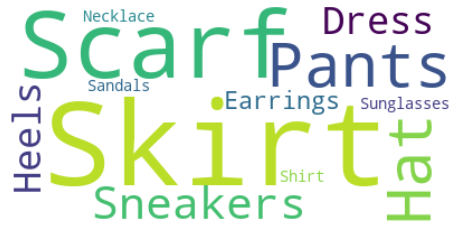

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ''

def word_cloud(dataset):
  words = ''
  for review in dataset:
    words += " ".join(review)+" "
  return words

wordcloud = WordCloud(background_color="white").generate(word_cloud(dataset))

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Apply the Apriori algorithm** min_support at 0.4

In [73]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import pandas as pd

te=TransactionEncoder()
te_data=te.fit(dataset).transform(dataset)
data_x=pd.DataFrame(te_data,columns=te.columns_)
print(data_x.head())

frequent_items= apriori(data_x, use_colnames=True, min_support=0.4)
print(frequent_items.head())

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

   Dress  Earrings    Hat  Heels  ...  Shirt  Skirt  Sneakers  Sunglasses
0  False     False   True  False  ...  False   True      True       False
1  False     False   True  False  ...  False   True      True        True
2   True     False  False   True  ...  False  False     False       False
3   True      True   True   True  ...  False  False     False       False
4  False      True  False  False  ...   True   True     False       False

[5 rows x 12 columns]
   support    itemsets
0      0.4     (Dress)
1      0.4  (Earrings)
2      0.6       (Hat)
3      0.4     (Heels)
4      0.8     (Pants)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Heels,Dress,0.4,0.4,0.4,1.000000,2.500000,0.24,inf
1,Dress,Heels,0.4,0.4,0.4,1.000000,2.500000,0.24,inf
2,Scarf,Dress,0.8,0.4,0.4,0.500000,1.250000,0.08,1.2
3,Dress,Scarf,0.4,0.8,0.4,1.000000,1.250000,0.08,inf
4,Earrings,Scarf,0.4,0.8,0.4,1.000000,1.250000,0.08,inf
...,...,...,...,...,...,...,...,...,...
61,Hat,Skirt,0.4,0.4,0.4,1.000000,2.500000,0.24,inf
62,Skirt,Sneakers,0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
63,Sneakers,Skirt,0.4,0.4,0.4,1.000000,2.500000,0.24,inf
64,Hat,Skirt,0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


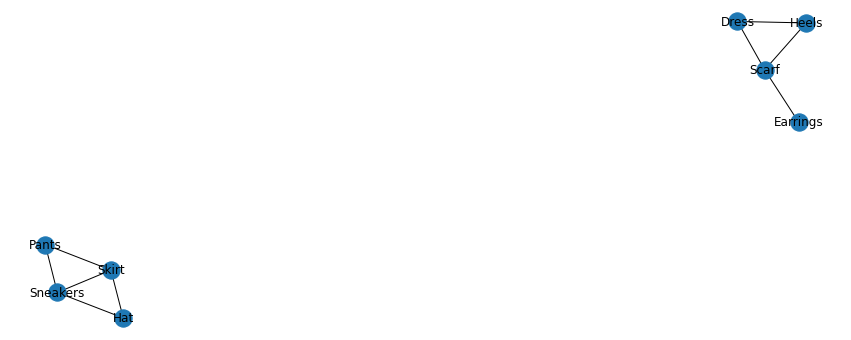

In [74]:
import networkx as nx
fig, ax=plt.subplots(figsize=(15,6))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

# Trying with a big data set

In [18]:
from google.colab import files
data_to_load = files.upload()
 
import io
data = pd.read_csv("BreadBasket_DMS.csv")
data

Saving BreadBasket_DMS.csv to BreadBasket_DMS.csv


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [44]:
lst=[]
for item in data['Transaction'].unique():
    lst2=list(set(data[data['Transaction']==item]['Item']))
    if len(lst2)>0:
        lst.append(lst2)

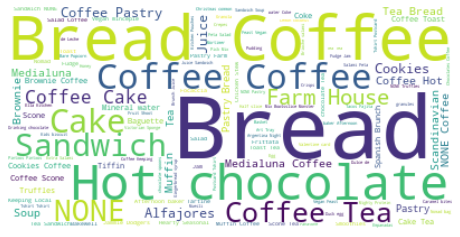

In [21]:
words = ''

wordcloud = WordCloud(background_color="white").generate(word_cloud(lst))

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [71]:
te=TransactionEncoder()
te_data=te.fit(lst).transform(lst)
data_x=pd.DataFrame(te_data,columns=te.columns_)
print(data_x.head())

frequent_items= apriori(data_x, use_colnames=True, min_support=0.03)
print(frequent_items.head())

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

   Adjustment  Afternoon with the baker  ...  Vegan mincepie  Victorian Sponge
0       False                     False  ...           False             False
1       False                     False  ...           False             False
2       False                     False  ...           False             False
3       False                     False  ...           False             False
4       False                     False  ...           False             False

[5 rows x 95 columns]
    support     itemsets
0  0.036093  (Alfajores)
1  0.324940      (Bread)
2  0.039765    (Brownie)
3  0.103137       (Cake)
4  0.475081     (Coffee)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Coffee,Cake,0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717
1,Cake,Coffee,0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
2,Medialuna,Coffee,0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
3,Coffee,Medialuna,0.475081,0.061379,0.034939,0.073542,1.198175,0.005779,1.013129
4,NONE,Coffee,0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
5,Coffee,NONE,0.475081,0.079005,0.042073,0.088560,1.120938,0.004539,1.010483
6,Coffee,Pastry,0.475081,0.085510,0.047214,0.099382,1.162216,0.006590,1.015402
7,Pastry,Coffee,0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
8,Sandwich,Coffee,0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
9,Coffee,Sandwich,0.475081,0.071346,0.037981,0.079947,1.120551,0.004086,1.009348


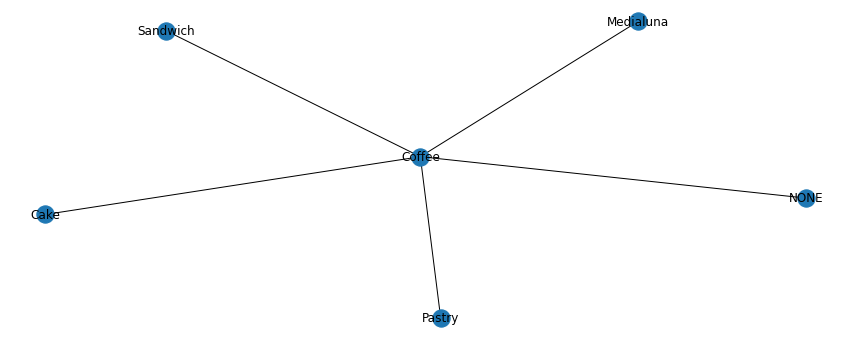

In [72]:
import networkx as nx
fig, ax=plt.subplots(figsize=(15,6))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()